In [ ]:
import pandas as pd
import numpy as np
import datetime
import time
import requests
from bs4 import BeautifulSoup
import os
from selenium.webdriver.common.keys import Keys 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import seaborn as sns
import pyperclip


In [65]:
from overview_trial import df_overview
df_overview

,Company,Sector,Industry,Country
Ticker,,,,
A,"Agilent Technologies, Inc.",Healthcare,Diagnostics & Research,USA
AA,Alcoa Corporation,Basic Materials,Aluminum,USA
AACG,ATA Creativity Global,Consumer Defensive,Education & Training Services,China
AACQ,Artius Acquisition Inc.,Financial,Shell Companies,USA
AAIC,Arlington Asset Investment Corp.,Real Estate,REIT - Mortgage,USA
...,...,...,...,...
ZVO,Zovio Inc,Consumer Defensive,Education & Training Services,USA
ZWRKU,Z-Work Acquisition Corp.,Financial,Shell Companies,USA
ZYME,Zymeworks Inc.,Healthcare,Biotechnology,Canada


In [66]:
from IBD import df_ibd
df_ibd

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,31.50,-0.06,-0.17,65.0,38.0,80.0,12.0,2.0,8.0,3.0,-75.0,909
ABM,51.93,-0.01,-0.02,80.0,86.0,72.0,6.0,3.0,11.0,3.0,-47.0,177
ABT,117.49,0.78,0.67,57.0,90.0,42.0,2.0,5.0,1.0,3.0,-72.0,1437
ACU,40.98,-0.62,-1.49,95.0,85.0,80.0,7.0,4.0,9.0,1.0,-39.0,8
ADI,149.21,-0.33,-0.22,84.0,88.0,47.0,9.0,5.0,8.0,4.0,-70.0,917
...,...,...,...,...,...,...,...,...,...,...,...,...
SHAC,9.75,9.75,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
ASAX,9.69,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
GMBT,9.90,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
GMII,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [67]:
from scraping import df_tt
df_tt

,Beta,ATR,SMA20,SMA50,SMA200,52W High,52W Low,RSI,Price,from Open,Gap
Ticker,,,,,,,,,,,
AB,1.42,1.11,0.1169,0.1387,0.3523,0.0188,2.1994,73.12,42.36,0.0168,0.0041
ABC,0.52,2.73,0.0759,0.0829,0.1424,-0.0067,0.6087,68.15,115.92,0.0049,-0.0024
ABR,1.93,0.55,0.0134,0.0792,0.3340,-0.0326,3.3995,56.52,16.63,-0.0072,0.0295
ABT,0.71,2.43,0.0097,0.0148,0.1242,-0.0645,0.9518,53.88,120.25,0.0175,0.0006
ABTX,1.12,1.51,0.0726,0.1299,0.4295,-0.0132,1.0484,68.75,42.77,0.0465,-0.0201
...,...,...,...,...,...,...,...,...,...,...,...
YETI,NaN,3.75,0.0651,0.0528,0.3290,-0.0724,3.9103,57.63,75.03,0.0085,0.0190
YUMC,0.85,1.53,-0.0036,0.0117,0.0927,-0.0633,0.5506,49.32,60.55,-0.0008,0.0008
YY,0.93,8.03,-0.0341,0.0495,0.2775,-0.2249,1.7990,48.65,115.40,-0.0053,0.0185


In [68]:
df_rs = df_ibd[df_ibd['RS Rating'] > 70]
df_rs

Symbol,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,Vol. % Change,Vol. (1000s)
HWM,31.50,-0.06,-0.17,65.0,38.0,80.0,12.0,2.0,8.0,3.0,-75.0,909
ABM,51.93,-0.01,-0.02,80.0,86.0,72.0,6.0,3.0,11.0,3.0,-47.0,177
ACU,40.98,-0.62,-1.49,95.0,85.0,80.0,7.0,4.0,9.0,1.0,-39.0,8
NBR,129.15,-0.72,-0.55,70.0,7.0,97.0,13.0,1.0,13.0,3.0,-67.0,87
HES,71.26,-1.23,-1.70,52.0,14.0,75.0,13.0,1.0,10.0,3.0,-62.0,840
...,...,...,...,...,...,...,...,...,...,...,...,...
ZIM,25.31,0.06,0.24,89.0,74.0,96.0,13.0,NaN,NaN,NaN,-1.0,960
TIRX,80.24,15.20,23.40,20.0,8.0,97.0,1.0,2.0,NaN,NaN,-71.0,42
GHVI,16.77,0.12,0.72,17.0,2.0,85.0,3.0,NaN,NaN,NaN,-81.0,833
TERN,26.31,0.40,1.54,51.0,47.0,77.0,8.0,NaN,NaN,NaN,-83.0,50


In [69]:
trend_template_list = list(set(df_rs.index.tolist()) & set(df_tt.index.tolist()))
len(trend_template_list)

378

In [71]:
df_overview_groupby_sector = pd.DataFrame(df_overview.groupby('Sector').count()['Company'])
df_overview_groupby_sector

,Company
Sector,
Basic Materials,246
Communication Services,266
Consumer Cyclical,497
Consumer Defensive,218
Energy,291
Financial,1298
Healthcare,1101
Industrials,587
Real Estate,276


In [70]:
filtered = df_overview[df_overview.index.isin(trend_template_list)]
filtered_groupby_sector = pd.DataFrame(filtered.groupby('Sector').count()['Company'])
filtered_groupby_sector

,Company
Sector,
Basic Materials,29
Communication Services,16
Consumer Cyclical,62
Consumer Defensive,18
Energy,7
Financial,71
Healthcare,53
Industrials,57
Real Estate,5


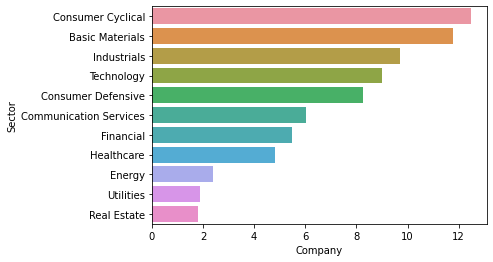

In [85]:
df_proportion = (filtered_groupby_sector/df_overview_groupby_sector*100).sort_values(by='Company', ascending=False)
sns.barplot(y=df_proportion.index, x=df_proportion['Company']);

In [92]:
df_proportion

,Company
Sector,
Consumer Cyclical,12.474849
Basic Materials,11.788618
Industrials,9.710392
Technology,8.992248
Consumer Defensive,8.256881
Communication Services,6.015038
Financial,5.469954
Healthcare,4.813806
Energy,2.405498


In [117]:
import datetime
df2 = df_proportion.T
df2.index = [datetime.datetime.today().date()]
df2.columns.name = 'Date'
df2

Date,Consumer Cyclical,Basic Materials,Industrials,Technology,Consumer Defensive,Communication Services,Financial,Healthcare,Energy,Utilities,Real Estate
2021-03-21,12.474849,11.788618,9.710392,8.992248,8.256881,6.015038,5.469954,4.813806,2.405498,1.886792,1.811594


In [115]:
df2.index.tolist()[-1] == df2.index.tolist()[-1]

True

In [74]:
df_conclusion = pd.concat([df_ibd, df_tt, filtered], join='inner', axis=1, )
df_conclusion

,Price,Price $ Change,Price % Change,Comp. Rating,EPS Rating,RS Rating,Ind Grp RS,SMR Rating,Acc/Dis Rating,Spon Rating,...,52W High,52W Low,RSI,Price,from Open,Gap,Company,Sector,Industry,Country
BC,105.72,2.13,2.06,96.0,91.0,83.0,9.0,5.0,10.0,3.0,...,-0.0784,2.9409,56.33,99.39,-0.0095,0.0039,Brunswick Corporation,Consumer Cyclical,Leisure,USA
UIS,27.26,0.00,0.00,67.0,72.0,91.0,6.0,NaN,8.0,3.0,...,-0.0727,1.7679,51.37,25.88,-0.0513,-0.0018,Unisys Corporation,Technology,Information Technology Services,USA
CLF,17.05,-0.49,-2.81,77.0,19.0,93.0,13.0,4.0,2.0,3.0,...,-0.1140,5.3232,54.14,16.63,-0.0131,0.0096,Cleveland-Cliffs Inc.,Basic Materials,Steel,USA
DAN,26.31,-0.55,-2.05,70.0,19.0,88.0,12.0,2.0,10.0,3.0,...,-0.0790,4.9390,55.22,25.30,-0.0113,0.0000,Dana Incorporated,Consumer Cyclical,Auto Parts,USA
DE,371.46,1.97,0.53,97.0,93.0,87.0,10.0,4.0,9.0,3.0,...,-0.0508,2.5057,66.83,372.48,-0.0133,-0.0076,Deere & Company,Industrials,Farm & Heavy Construction Machinery,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEG,49.02,4.32,9.66,52.0,22.0,83.0,7.0,2.0,8.0,4.0,...,-0.0894,1.8641,56.27,47.00,-0.0325,0.0180,"Montrose Environmental Group, Inc.",Industrials,Waste Management,USA
FTHM,40.10,1.77,4.62,62.0,43.0,95.0,8.0,2.0,9.0,NaN,...,-0.2258,4.1050,55.97,43.98,0.0651,-0.0051,Fathom Holdings Inc.,Real Estate,Real Estate Services,USA
ASO,25.32,-0.38,-1.49,97.0,99.0,83.0,7.0,4.0,8.0,4.0,...,-0.0836,1.1295,55.40,25.66,0.0297,-0.0068,"Academy Sports and Outdoors, Inc.",Consumer Cyclical,Specialty Retail,USA
NGMS,37.73,2.37,6.70,93.0,69.0,80.0,5.0,5.0,11.0,5.0,...,-0.0382,1.1837,78.38,40.77,-0.0225,0.0188,NeoGames S.A.,Communication Services,Electronic Gaming & Multimedia,Israel


In [ ]:
trend_template_str = ','.join(trend_template_list)

In [ ]:
trend_template_str = 'A,AAPL,AA'

In [ ]:

def finviz_link_charts():
    
    finviz_chart_url = 'https://finviz.com/screener.ashx?v=211&t='
    trend_template_list = pd.merge(df_rs, df_tt, left_index=True, right_index=True).index.tolist()
    
    trend_template_str = ','.join(trend_template_list)
    
    result = finviz_chart_url + trend_template_str
    
    return result
finviz_link_charts()

In [ ]:
from overview_trial import df_overview
df_overview
#del df_overview['Price']
df_overview

In [ ]:
pd.read_csv('./Finviz/20210221_total.csv', index_col = 0)

In [ ]:
url = 'https://finviz.com/screener.ashx'
driver = webdriver.Chrome('./chromedriver')
ticker_input_x = '//*[@id="tickersInput"]'
enter_button_x = '/html/body/table[3]/tbody/tr[1]/td/table/tbody/tr[2]/td[10]/input'
charts_button_x = '//*[@id="screener-content"]/table/tbody/tr[1]/td/table/tbody/tr/td[8]/a'
driver.get(url)